In [ ]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Pacman Dependancies

In [ ]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

     |████████████████████████████████| 1.2 MB 3.9 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Imports and Helper functions


In [ ]:
# Import libraries
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

# if you want to change the frozen lake enviornment from stocastic to deterministic
from gym.envs.registration import register
register(
    id = 'FrozenLakeNotSlippery-v0',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name': '4x4', 'is_slippery': False}
)

In [ ]:
# Create enviornment
env = gym.make('FrozenLakeNotSlippery-v0')

In [ ]:
# check the states 
env.observation_space

Discrete(16)

In [ ]:
# check action space
env.action_space

Discrete(4)

Streaming output truncated to the last 5000 lines.
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
episode finished after 8 steps
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
episode finished after 3 steps
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
episode finished after 7 steps
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
episode finished after 6 steps
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
episo

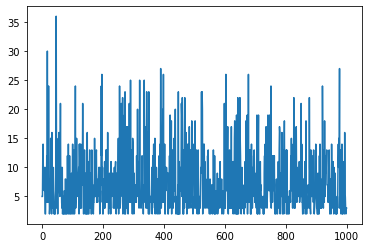

In [ ]:
num_episode = 1000
steps_total = []

for i_episode in range(num_episode):
    state = env.reset()
    step = 0
    #for step in range(100):
    while True:
        step += 1
        action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)

        env.render()
        if done:
            steps_total.append(step)
            print('episode finished after %i steps' %step)
            break

print('Average number of steps: %.2f' % (sum(steps_total)/num_episode))
plt.plot(steps_total)
plt.show()